In [110]:
from time import process_time

In [111]:
t1_start = process_time()

In [112]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [113]:
data = pd.read_csv("WineQT.csv")

In [114]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [115]:
#Id column is useless so we can drop it.
data.drop('Id',axis=1,inplace=True)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


* float64(11) : fixed acidity, volatile 
acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol
* int64(1) : quality 

## Wine dataset has no missing values

#Visualize

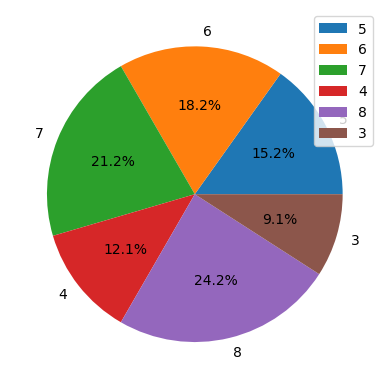

In [117]:
#distribution of quality within the dataset
#get feature 
var = data["quality"]
varValue = var.value_counts()
fig, ax = plt.subplots()
ax.pie(varValue.index.values, labels=varValue.index , autopct='%1.1f%%')
ax.legend()

## Looking at the distribution of the data.

In [118]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=len(data.columns)//2)
for i, var in enumerate(data.columns):
    fig.add_trace(go.Box(y=data[var], name=var),row=i%2+1, col=i//2+1)

fig.update_traces(boxpoints='all', jitter=.3)
fig.update_layout(height=1000, showlegend=False)
fig.show()

## Correlation Between each feature with quality

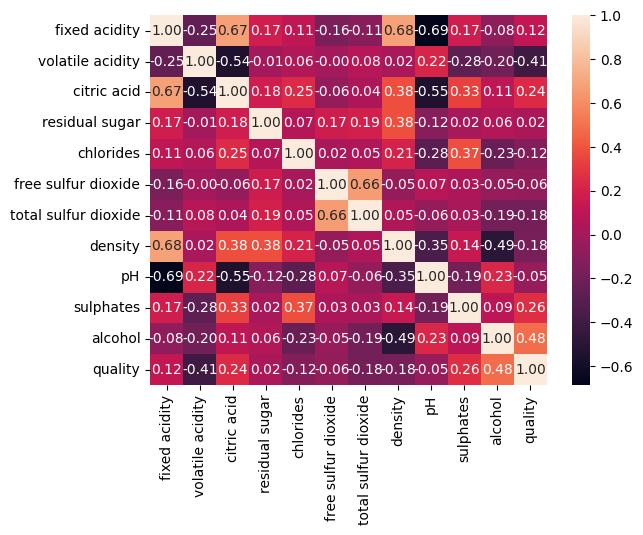

In [119]:
import seaborn as sns
list1 = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol","quality"]
sns.heatmap(data[list1].corr(), annot=True, fmt=".2f")
plt.show()

Alcohol(0.48), sulphates(0.26) and citric acid (0.24) seem to have correlation with quality feature.

**Data Correlation**: Is a way to understand the relationship between multiple variables and attributes in your dataset. Using Correlation, you can get some insights such as:

* One or multiple attributes depend on 
another attribute or a cause for another attribute.
* One or multiple attributes are associated with other attributes.

## Alcohol -- Quality

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a dep

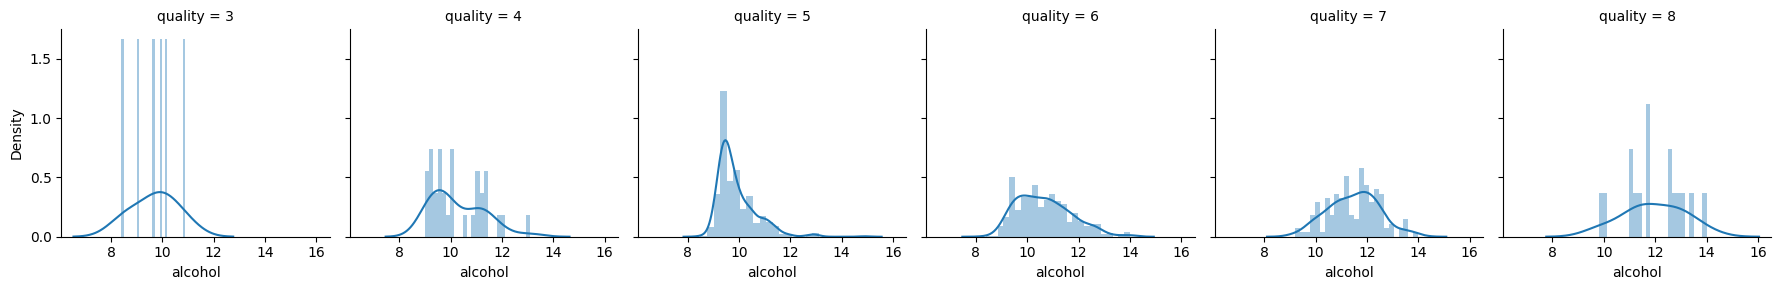

In [120]:
g = sns.FacetGrid(data,col="quality")
g.map(sns.distplot,"alcohol",bins=25)
plt.show()

## Checking Unbalanced Data
### check the skewness in the data. If the skewness is high it means that data is not normally distributed.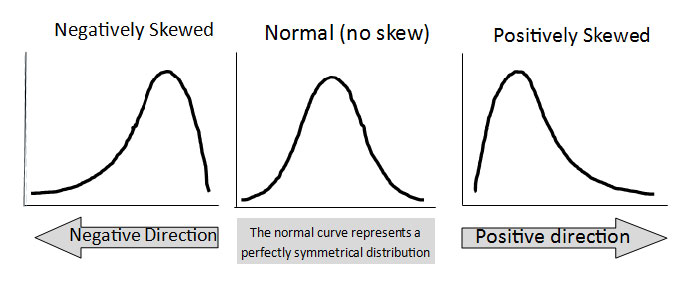

In [121]:
from plotly.express import bar

skewness = data.skew().sort_values(ascending = True)
fig = bar(x=skewness, y= skewness.index, color = skewness.index,labels = {"x":"Skewness", "y":"Descriptions"})
fig.update_layout(showlegend = False)
fig.add_vline(x=1, line_dash="dash", line_color="red")
fig.show()

Note: According to skewness some features are unbalanced. We should fix them before training with the model.

## Fixing the Unbalanced Features

**Synthetic Minority Oversampling Technique (SMOTE)** :
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

1. Choose a minority class as the input vector.
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.
4. Repeat the steps until the data is balanced.

In [122]:
#Fixing the unbalanced features
from imblearn.over_sampling import SMOTE

over_sample = SMOTE()
X = data.drop(["quality"], axis=1)
y = data["quality"]
#features = x_smote
# labels = y_smote
x_smote, y_smote = over_sample.fit_resample(X , y)

## Normalization

In [123]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(x_smote),columns = x_smote.columns)


In [124]:
y_smote

0       5
1       5
2       5
3       6
4       5
       ..
2893    8
2894    8
2895    8
2896    8
2897    8
Name: quality, Length: 2898, dtype: int64

In [125]:
scaled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.000000,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.000000,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.040000,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.560000,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.000000,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
2893,0.380433,0.150485,0.427080,0.084716,0.089096,0.044340,0.029881,0.478155,0.355251,0.330282,0.320830
2894,0.370377,0.205685,0.514678,0.213465,0.113661,0.173980,0.092980,0.559512,0.453663,0.290860,0.700957
2895,0.125761,0.415277,0.118428,0.045062,0.059925,0.175963,0.234884,0.215902,0.577283,0.283957,0.627524
2896,0.186568,0.176229,0.282706,0.065592,0.096769,0.247410,0.090086,0.249800,0.502642,0.228461,0.576834


In [126]:
#importing model:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


#for metrics:
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.metrics import f1_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import Markdown, display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import subplots, text

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [128]:
#RANDOM FOREST CLASSIFIER:
random_forest_classifier = RandomForestClassifier(n_estimators=1000, bootstrap=False, class_weight="balanced", random_state=247)
predicted = cross_val_predict(random_forest_classifier, scaled_data, y_smote, cv=10)
random_forest_classifier.fit(scaled_data, y_smote)



RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       n_estimators=1000, random_state=247)

[[483   0   0   0   0   0]
 [  1 466   9   7   0   0]
 [  4  29 294 142  14   0]
 [  2  25 144 218  86   8]
 [  0   0   2  19 457   5]
 [  0   0   0   2   7 474]]


Text(8, 5, 'Random Forest Classifier\n              precision    recall  f1-score   support\n\n           3       0.99      1.00      0.99       483\n           4       0.90      0.96      0.93       483\n           5       0.65      0.61      0.63       483\n           6       0.56      0.45      0.50       483\n           7       0.81      0.95      0.87       483\n           8       0.97      0.98      0.98       483\n\n    accuracy                           0.83      2898\n   macro avg       0.81      0.83      0.82      2898\nweighted avg       0.81      0.83      0.82      2898\n\nAccuracy percent: 82.53')

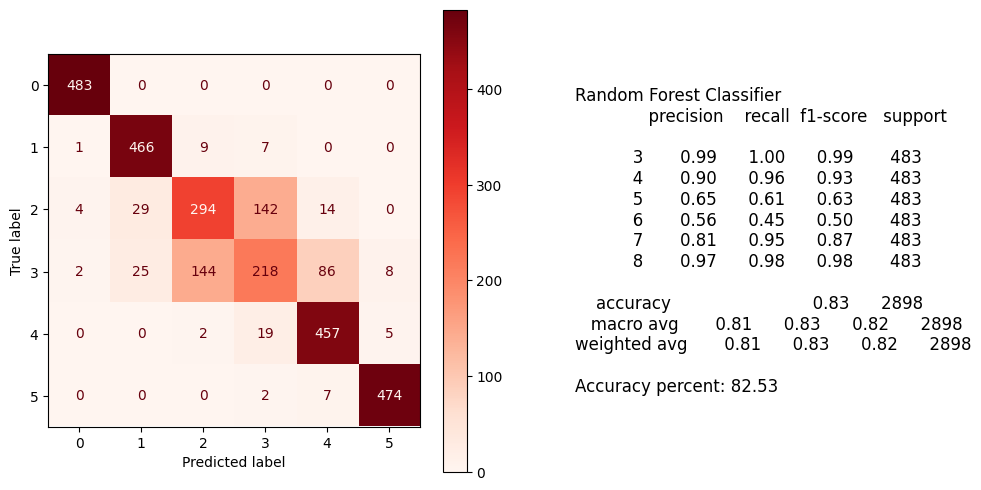

In [129]:
cm = confusion_matrix(y_smote,predicted)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = subplots(figsize=(6,6))
ax.grid(False)
disp.plot(cmap='Reds', ax=ax)
text(8, 5,  "Random Forest Classifier" + '\n' + classification_report(y_smote,predicted, zero_division=1) + '\n' + "Accuracy percent: " + 
             str(accuracy_score(predicted, y_smote)*100)[:5], fontsize=12, color='k',ha='left', va='bottom' )

In [130]:
#K-Nearest Neighbors (KNN) Classification
knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
#knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
predicted_knn = cross_val_predict(knn, scaled_data, y_smote, cv=10)
knn.fit(scaled_data, y_smote)


KNeighborsClassifier(n_neighbors=3)

Text(8, 5, 'K-Nearest Neighbors (KNN) Classifier\n              precision    recall  f1-score   support\n\n           3       0.94      1.00      0.97       483\n           4       0.75      0.99      0.85       483\n           5       0.59      0.41      0.49       483\n           6       0.49      0.32      0.38       483\n           7       0.75      0.88      0.81       483\n           8       0.89      0.98      0.94       483\n\n    accuracy                           0.76      2898\n   macro avg       0.74      0.76      0.74      2898\nweighted avg       0.74      0.76      0.74      2898\n\nAccuracy percent: 76.32')

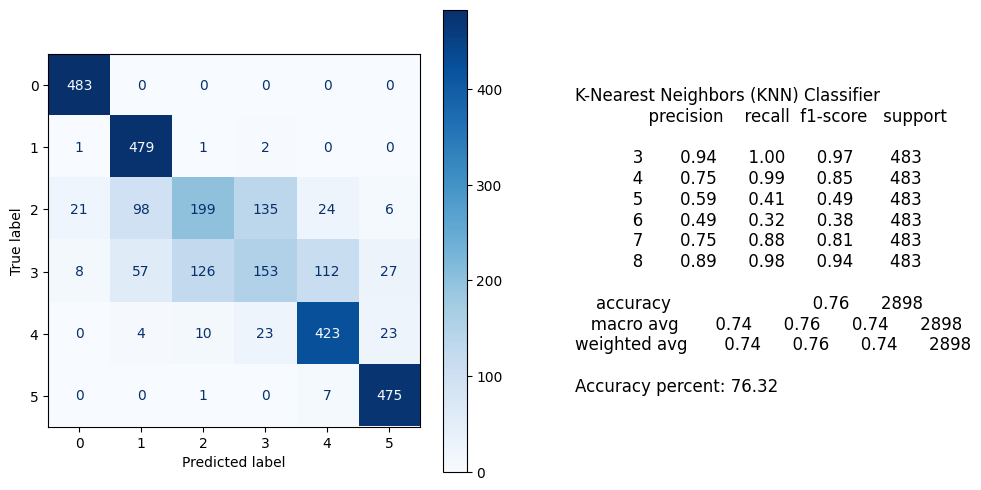

In [131]:
cm = confusion_matrix(y_smote,predicted_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = subplots(figsize=(6,6))
ax.grid(False)
disp.plot(cmap=plt.cm.Blues, ax=ax)
text(8, 5,  "K-Nearest Neighbors (KNN) Classifier" + '\n' + classification_report(y_smote,predicted_knn, zero_division=1) + '\n' + "Accuracy percent: " + 
             str(accuracy_score(predicted_knn, y_smote)*100)[:5], fontsize=12, color='k',ha='left', va='bottom')

In [132]:
print("Random Forest Classifier :",random_forest_classifier.predict(scaler.transform([[1.2, 0.280,  0.56,   1.9,    0.075,  17.0,   60.0,   0.99800,    3.16,   0.58,   9.8]]))) 

Random Forest Classifier : [6]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [133]:
print("K-Nearest Neighbors Classifier :",knn.predict(scaler.transform([[7.4	,0.50,	0.00,	1.9,	0.07,	11.0,	20.0,	0.9978,	3.51,	0.56,	9.4	]])))

K-Nearest Neighbors Classifier : [5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [134]:
t1_stop = process_time()
Chatgpt_start = process_time() 

In [135]:
# chatGPT version of the project

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a dep

Random Forest Classifier:
Accuracy score: 0.8632183908045977
F1 score: 0.8587879103558361
Precision score: 0.8587871968876707
Recall score: 0.8632183908045977
              precision    recall  f1-score   support

           3       0.97      1.00      0.99       139
           4       0.94      0.98      0.96       145
           5       0.78      0.70      0.74       155
           6       0.72      0.61      0.66       153
           7       0.81      0.96      0.88       144
           8       0.96      0.96      0.96       134

    accuracy                           0.86       870
   macro avg       0.86      0.87      0.86       870
weighted avg       0.86      0.86      0.86       870

K-Nearest Neighbors Classifier:
Accuracy score: 0.8149425287356322
F1 score: 0.8029314518594366
Precision score: 0.8069316962697608
Recall score: 0.8149425287356322
              precision    recall  f1-score   support

           3       0.93      1.00      0.97       139
           4       0.82 

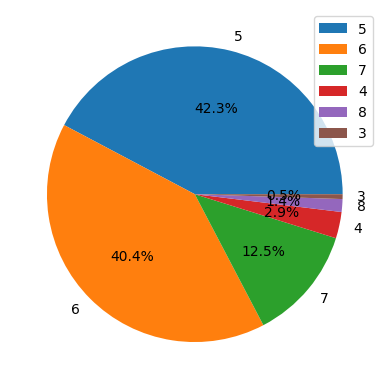

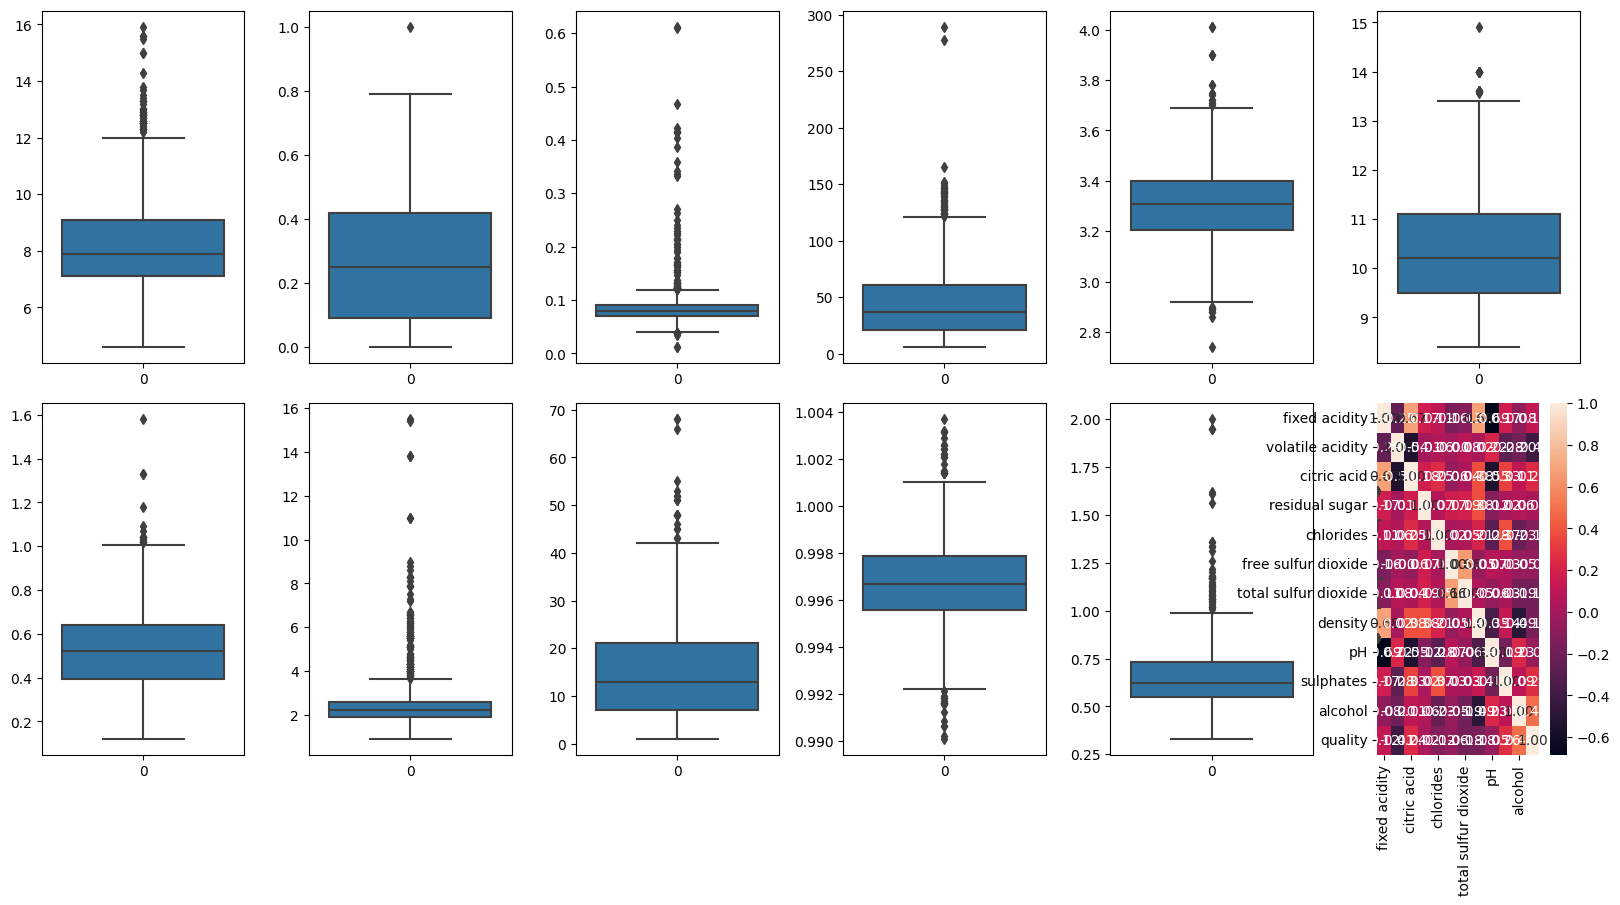

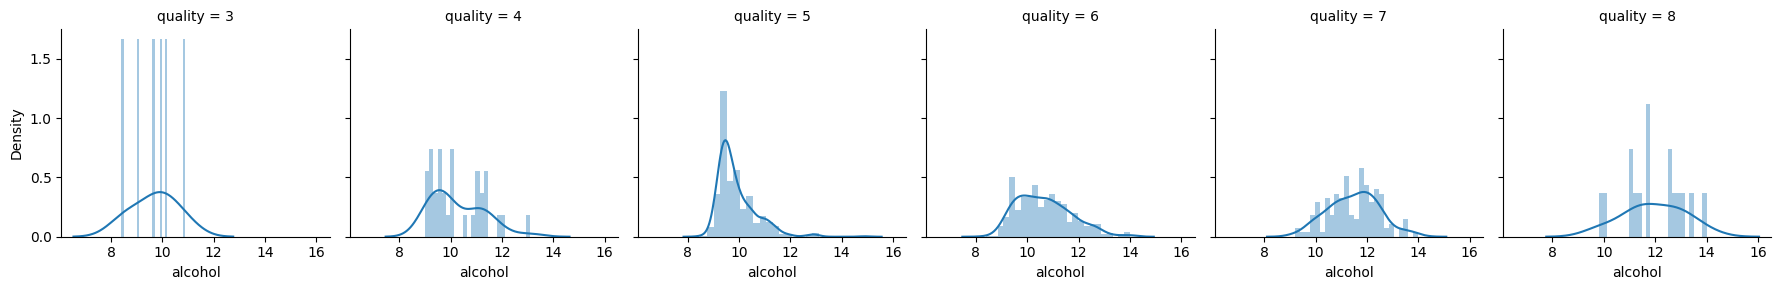

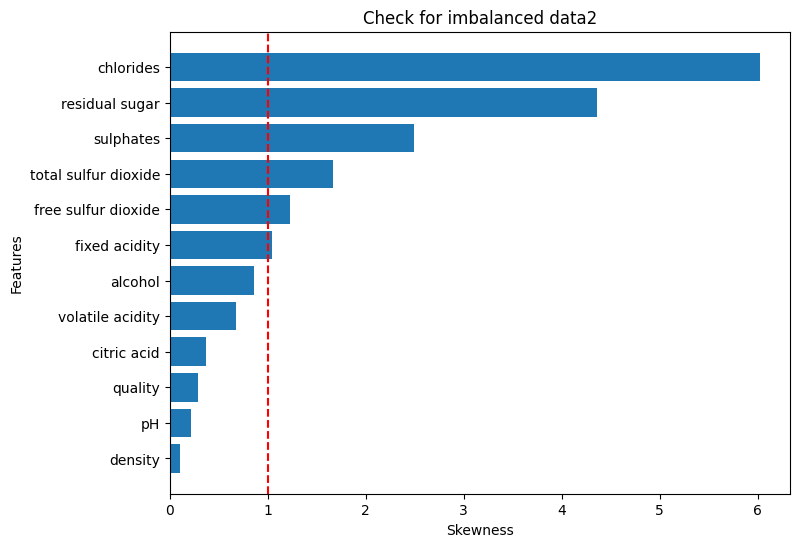

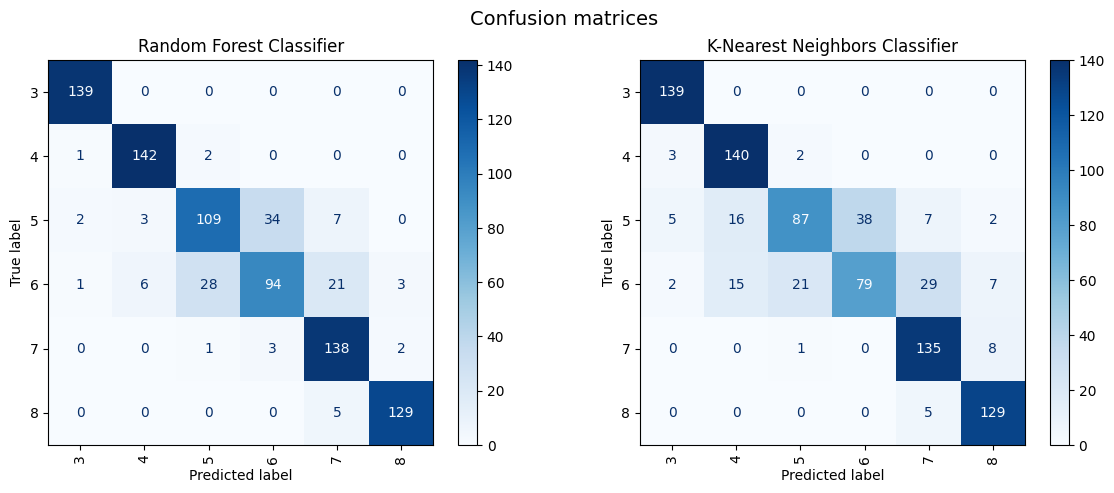

In [136]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_predict, GridSearchCV, train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score 
from imblearn.over_sampling import SMOTE 

# Load the data 
data2 = pd.read_csv("WineQT.csv") 

# Drop the "Id" column which is not useful 
data2.drop('Id', axis=1, inplace=True) 

# Check the data types and missing values 
data2.info() 

# Get the distribution of quality within the dataset 
var = data2["quality"] 
varValue = var.value_counts() 
fig, ax = plt.subplots() 
ax.pie(varValue.values, labels=varValue.index , autopct='%1.1f%%') 
ax.legend() 

# Check the distribution of the features 
fig, axs = plt.subplots(nrows=2, ncols=len(data2.columns)//2, figsize=(16,8))
for i, var in enumerate(data2.columns): 
    sns.boxplot(data2[var], ax=axs[i%2][i//2], orient="v")
fig.tight_layout()

# Check the correlation between each feature and quality 
list1 = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol","quality"] 
sns.heatmap(data2[list1].corr(), annot=True, fmt=".2f") 

# Check the distribution of alcohol by quality 
g = sns.FacetGrid(data2,col="quality") 
g.map(sns.distplot,"alcohol",bins=25) 

# Check for imbalanced data 
skewness = data2.skew().sort_values(ascending = True) 
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(skewness.index, skewness.values)
ax.set_xlabel('Skewness')
ax.set_ylabel('Features')
ax.set_title('Check for imbalanced data2')
ax.axvline(x=1, linestyle="--", color="r")

# Balance the data using SMOTE 
over_sample = SMOTE() 
X = data2.drop(["quality"], axis=1) 
y = data2["quality"] 
x_smote, y_smote = over_sample.fit_resample(X , y) 

# Scale the data using MinMaxScaler 
scaler = MinMaxScaler() 
scaled_data = pd.DataFrame(scaler.fit_transform(x_smote),columns = x_smote.columns) 

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y_smote, test_size=0.3, random_state=42)

# Train the Random Forest Classifier 
param_grid_rfc = {'n_estimators': [500, 1000, 1500], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc_cv = GridSearchCV(rfc, param_grid_rfc, cv=5, n_jobs=-1)
rfc_cv.fit(X_train, y_train)
rfc_best = rfc_cv.best_estimator_
rfc_y_pred = rfc_best.predict(X_test)


param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
knn_cv.fit(X_train, y_train)
knn_best = knn_cv.best_estimator_
knn_y_pred = knn_best.predict(X_test)


print("Random Forest Classifier:")
print("Accuracy score:", accuracy_score(y_test, rfc_y_pred))
print("F1 score:", f1_score(y_test, rfc_y_pred, average='weighted'))
print("Precision score:", precision_score(y_test, rfc_y_pred, average='weighted'))
print("Recall score:", recall_score(y_test, rfc_y_pred, average='weighted'))
print(classification_report(y_test, rfc_y_pred))

print("K-Nearest Neighbors Classifier:")
print("Accuracy score:", accuracy_score(y_test, knn_y_pred))
print("F1 score:", f1_score(y_test, knn_y_pred, average='weighted'))
print("Precision score:", precision_score(y_test, knn_y_pred, average='weighted'))
print("Recall score:", recall_score(y_test, knn_y_pred, average='weighted'))
print(classification_report(y_test, knn_y_pred))

fig, axs = plt.subplots(ncols=2, figsize=(14, 5))
fig.suptitle("Confusion matrices", fontsize=14)

cm_rfc = confusion_matrix(y_test, rfc_y_pred)
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=rfc_best.classes_)
disp_rfc.plot(ax=axs[0], cmap='Blues', xticks_rotation='vertical')
axs[0].set_title("Random Forest Classifier")

cm_knn = confusion_matrix(y_test, knn_y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_best.classes_)
disp_knn.plot(ax=axs[1], cmap='Blues', xticks_rotation='vertical')
axs[1].set_title("K-Nearest Neighbors Classifier")

plt.show()

In [137]:
Chatgpt_stop = process_time() 

In [138]:
print("Fatma Vatansever", t1_stop - t1_start)
print("ChatGPT", Chatgpt_stop - Chatgpt_start)


Fatma Vatansever 144.17867647900005
ChatGPT 21.85399298699997
